# SciPy Python's math toolbox
SciPy is a large collection of mathematical functions and we will use only a tiny fraction in this lecture's examples. Here we will plot a Gaussian distribution of response data. 

In [10]:
# Again our base function to get some real data. Note the delay between requests - you don't want to end up on a black list :)
from datetime import datetime
import requests
import numpy as np
from time import sleep

url = "http://heise.de"

def measureResponseTimes(url, attempts):
    timeticks = []
    values = []
    result = {}

    for i in range(attempts):
        response = requests.post(url)
        timeticks.append(datetime.now())
        values.append(response.elapsed.total_seconds()) 
        sleep(0.005)
    result["timeticks"] = timeticks
    result["values"] = values
    return result

result = measureResponseTimes(url, 150)

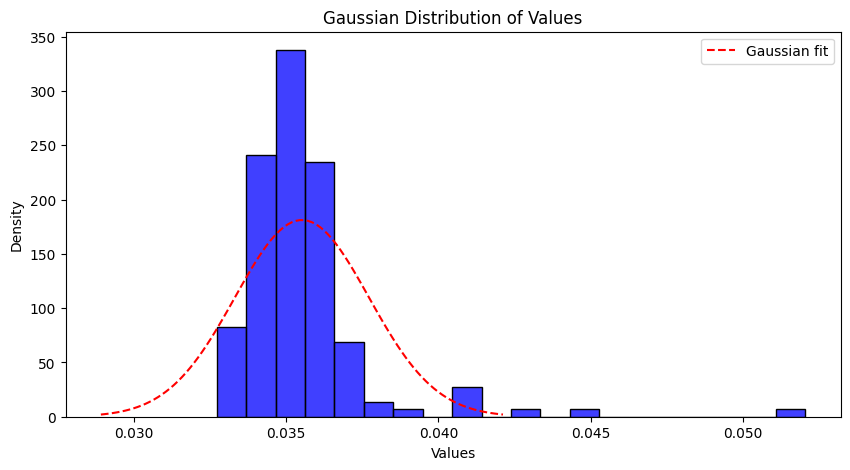

Mean 0.035514446666666664
Standard deviation 0.0022019900803187608


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Provided values
#values = [0.054822, 0.036747, 0.043424, 0.037305, 0.041153, 0.040589, 0.03728, 0.041917, 0.042918, 0.036188]
values = np.array(result["values"])

# Calculate the mean and standard deviation
mean = np.mean(values)
std_dev = np.std(values)

# Plot the Gaussian distribution
plt.figure(figsize=(10, 5))
sns.histplot(values, kde=False, stat='density', bins=20, color='blue', edgecolor='black')

# Plot the Gaussian fit
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r--', label='Gaussian fit')

plt.title('Gaussian Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

print("Mean",mean)
print("Standard deviation", std_dev)

## Tasks

* Load response time data from multiple urls and compute gaussian distribution
* plot a distribution diagram for each series
* plot all distributions in one diagram